In [1]:
import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, mean_squared_error

In [2]:
X = pd.read_csv('train.csv', index_col = 'employee_id')
X_test = pd.read_csv('test.csv', index_col = 'employee_id')
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


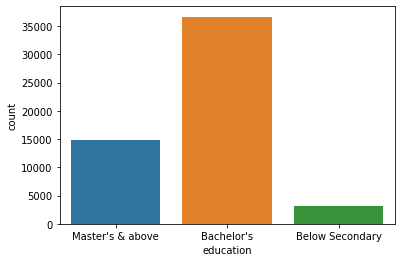

In [4]:
X['previous_year_rating'].fillna(2.0, inplace = True)
X_test['previous_year_rating'].fillna(2.0, inplace = True)

X['previous_year_rating'].unique()

X['education'].fillna('Below Secondary', inplace = True)
X_test['education'].fillna('Below Secondary', inplace = True)

X['education'].unique()

sns.countplot(x='education', data =X)

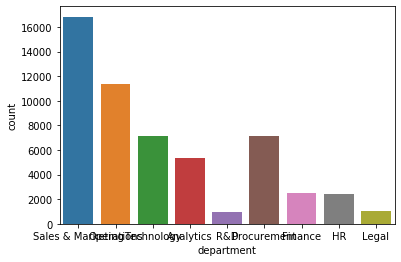

In [5]:
sns.countplot(x='department', data = X)

In [6]:
X['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [7]:
X.groupby('department')['previous_year_rating'].mean()

department
Analytics            3.421712
Finance              3.338328
HR                   3.332093
Legal                3.178056
Operations           3.547585
Procurement          3.220790
R&D                  3.427427
Sales & Marketing    2.984798
Technology           3.070048
Name: previous_year_rating, dtype: float64

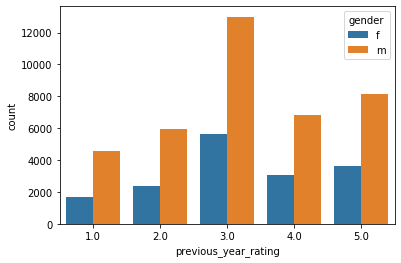

In [8]:
sns.countplot(x = 'previous_year_rating', hue='gender', data = X)

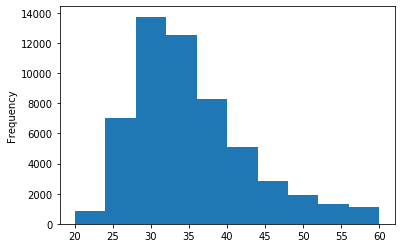

In [9]:
X['age'].plot.hist()

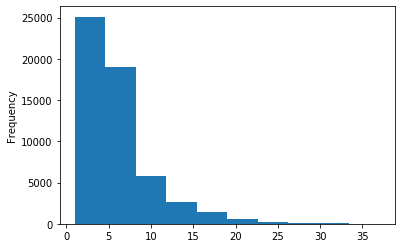

In [10]:
X['length_of_service'].plot.hist()

In [11]:
cols = [col for col in X.columns if X[col].dtype == object]
for i in cols:
    n = X[i].unique()
    X[i].replace(n, range(len(n)), inplace = True)
    X_test[i].replace(n, range(len(n)), inplace = True)

In [12]:
X.shape

(54808, 13)

In [16]:
y = X.is_promoted              
X.drop(['is_promoted'], axis=1, inplace=True)